# 标定数据处理与分析
* 罗翊杰 
* 1951578@tongji.edu.cn
* MERCI Project
* 2023/4/15

### 1. 数据载入
time,x,y,d,press,skin0_x,skin0_y,skin0_z,skin1_x,skin1_y,skin1_z,skin2_x,skin2_y,skin2_z,skin3_x,skin3_y,skin3_z


In [2]:
import numpy as np
# 不同弹性体厚度分析，载入5组数据
# 数据集路径
tset_path = {
    "t14":'./../Data/TSET_squ1803/squ1803_T1.4_C1.0.csv',
    "t17":'./../Data/TSET_squ1803/squ1803_T1.7_C1.0.csv',
    "t20":'./../Data/TSET_squ1803/squ1803_T2.0_C1.0.csv',
    "t23":'./../Data/TSET_squ1803/squ1803_T2.3_C1.0.csv',
    "t26":'./../Data/TSET_squ1803/squ1803_T2.6_C1.0_2.csv',
}
# 载入数据
tset = {}
for t in tset_path:
    print('loading:'+tset_path[t]+'...',end='',flush=True)
    with open(tset_path[t]) as f:
        tset[t] = np.loadtxt(f,delimiter=",",skiprows=1) 
    print('[ok]') 

nt=0
for n in tset['t14'][:,4]:
    if(nt>=1400 and nt<1600):
        tset['t14'][nt,4] = n + 0.77835152585233 + 3.5
    nt+=1


loading:./../Data/TSET_squ1803/squ1803_T1.4_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T1.7_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T2.0_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T2.3_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T2.6_C1.0_2.csv...[ok]


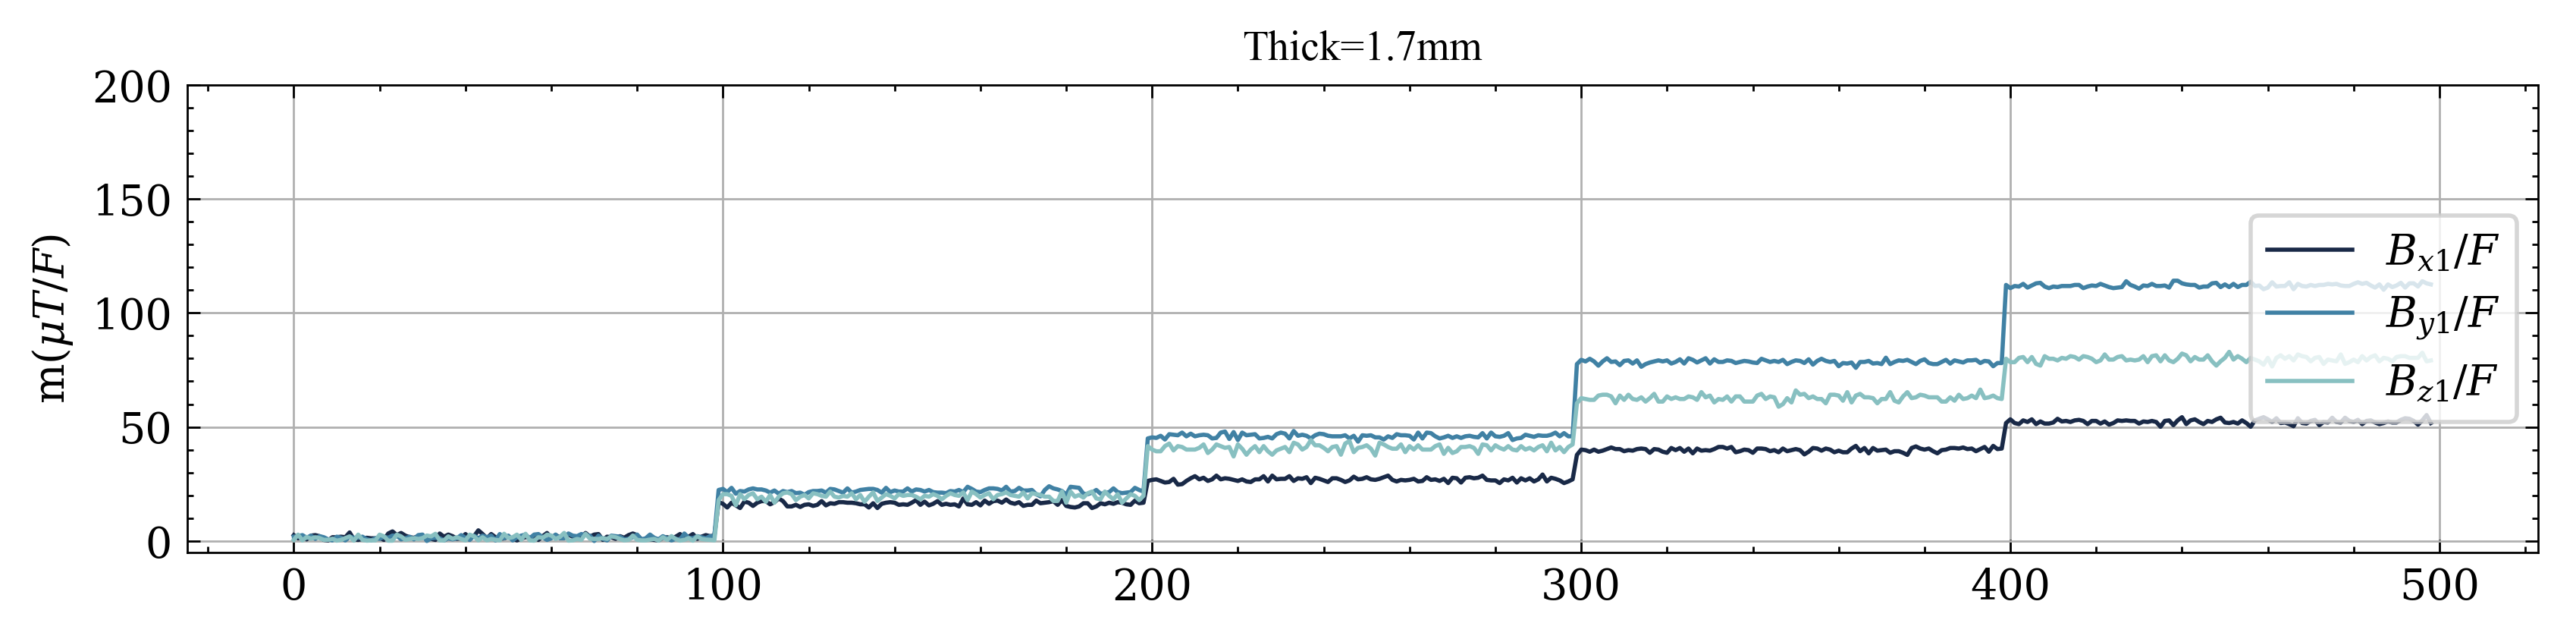

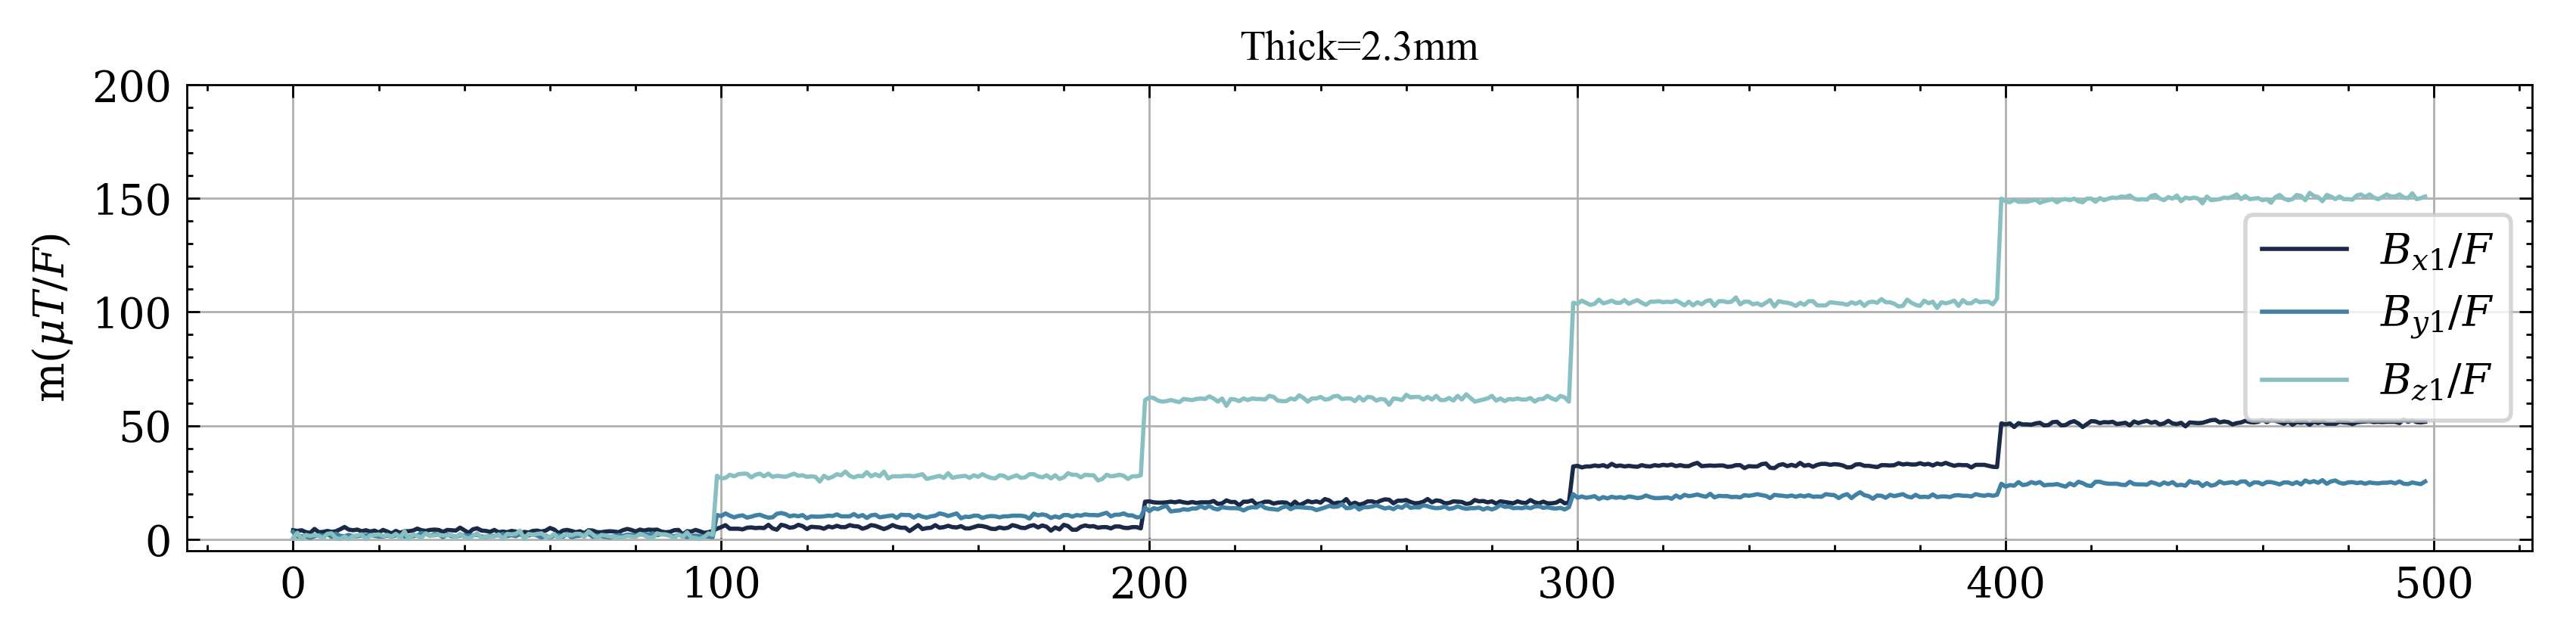

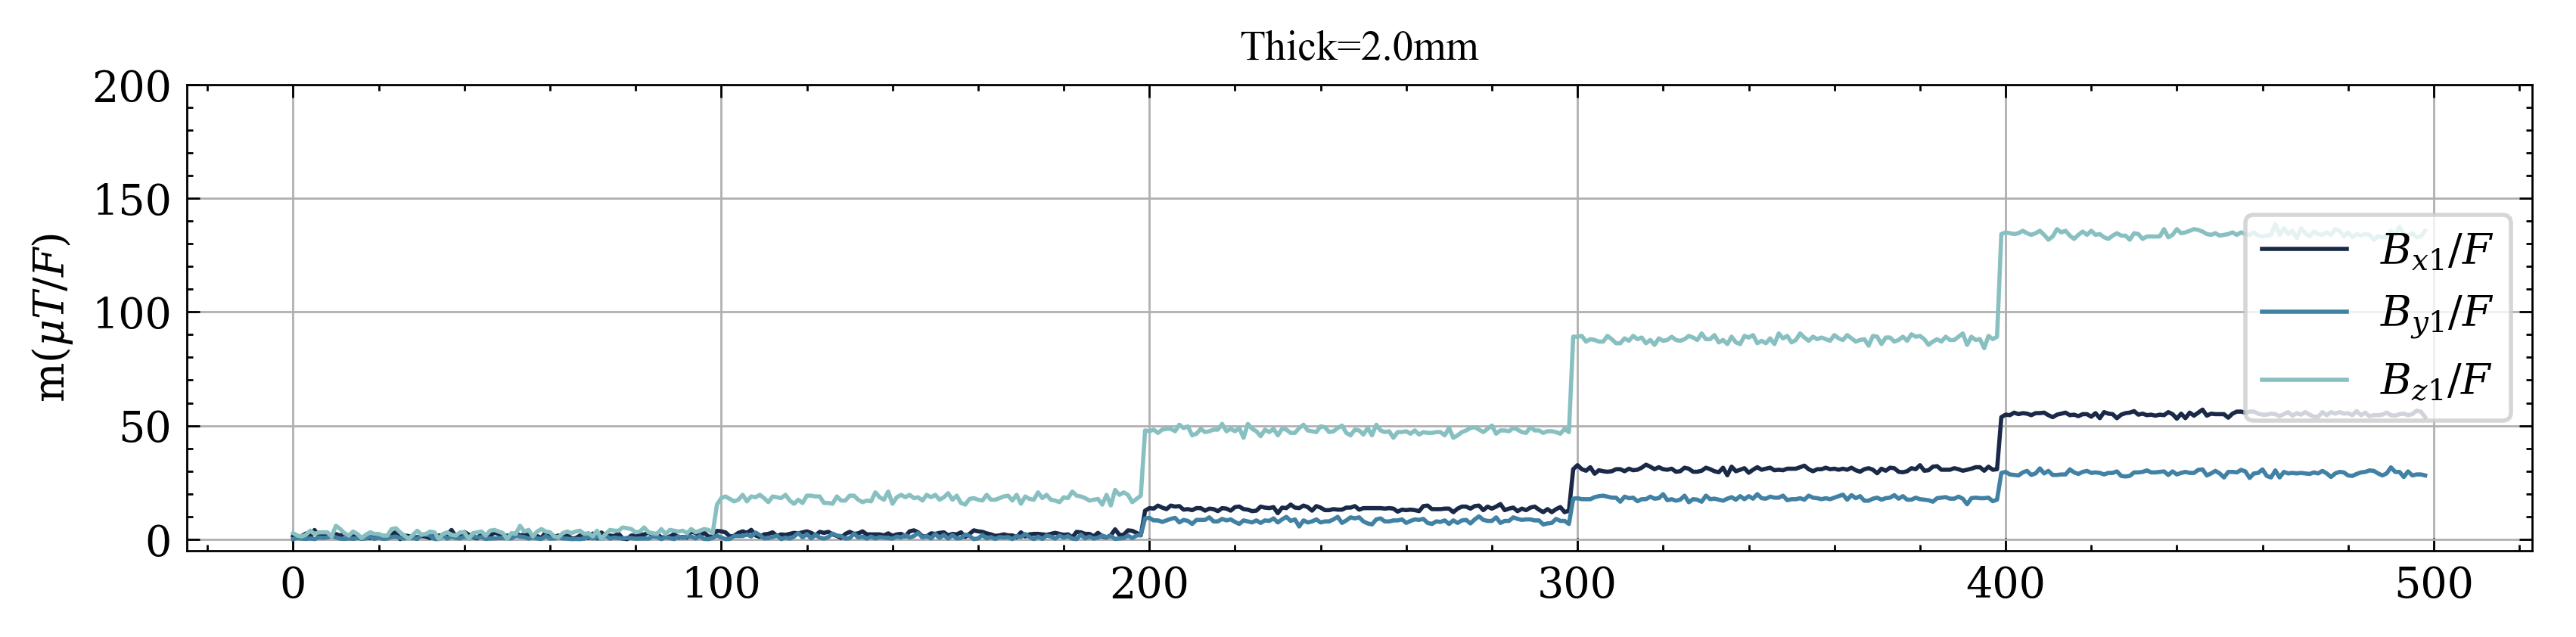

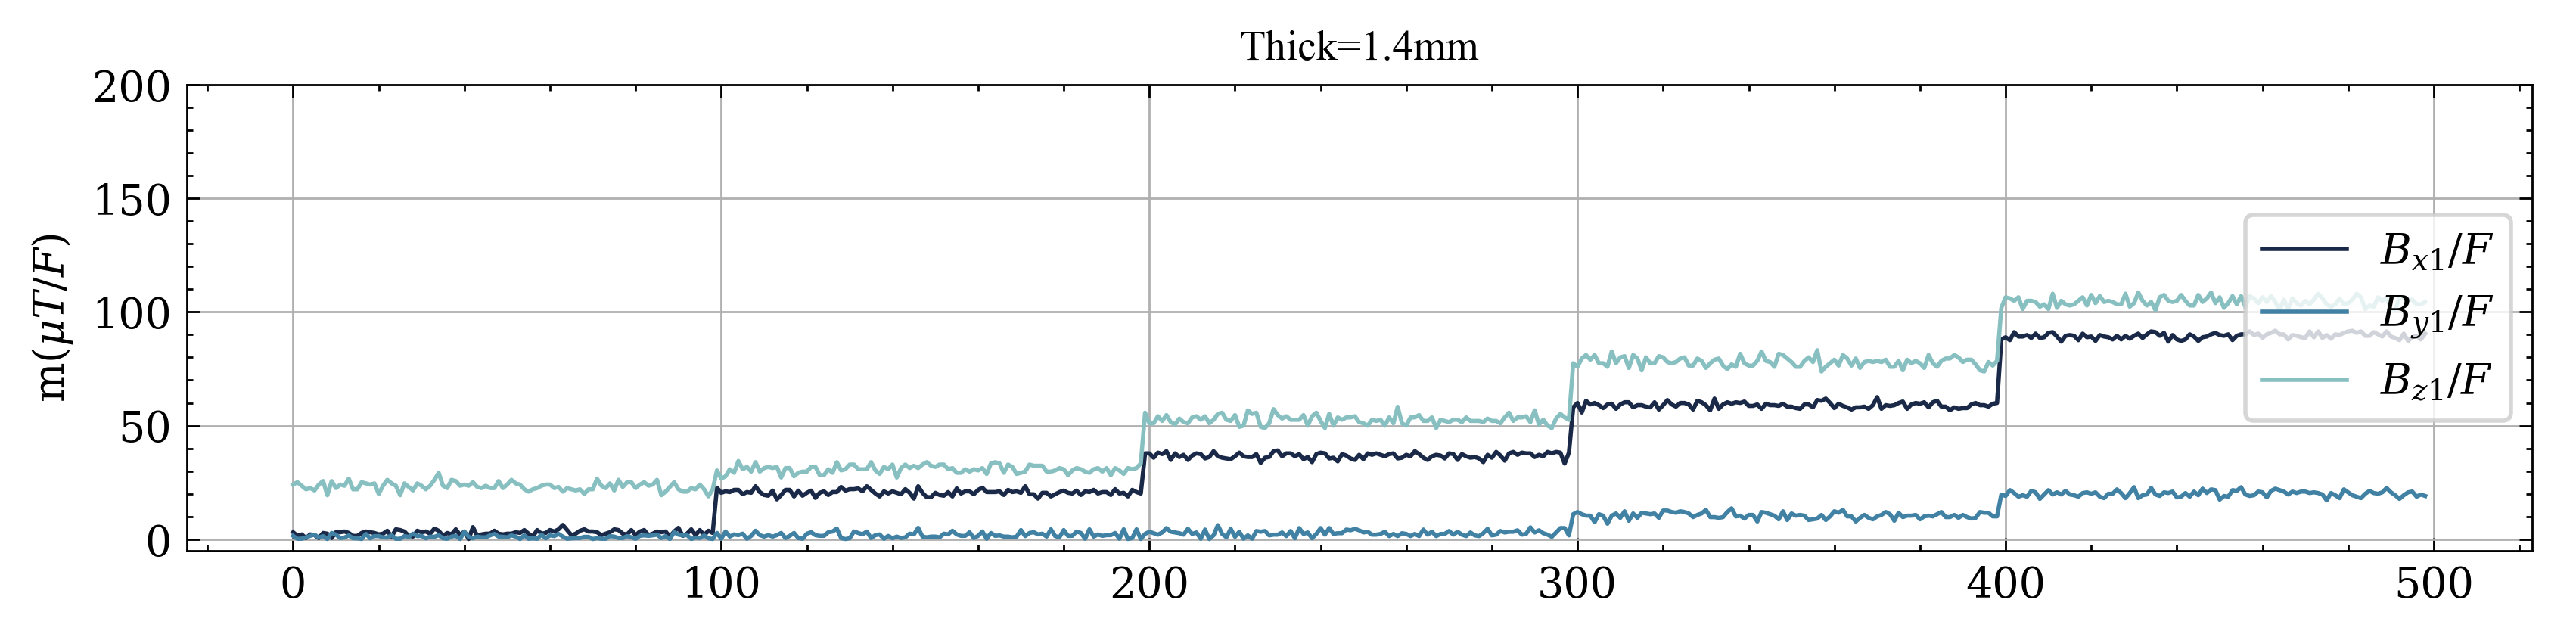

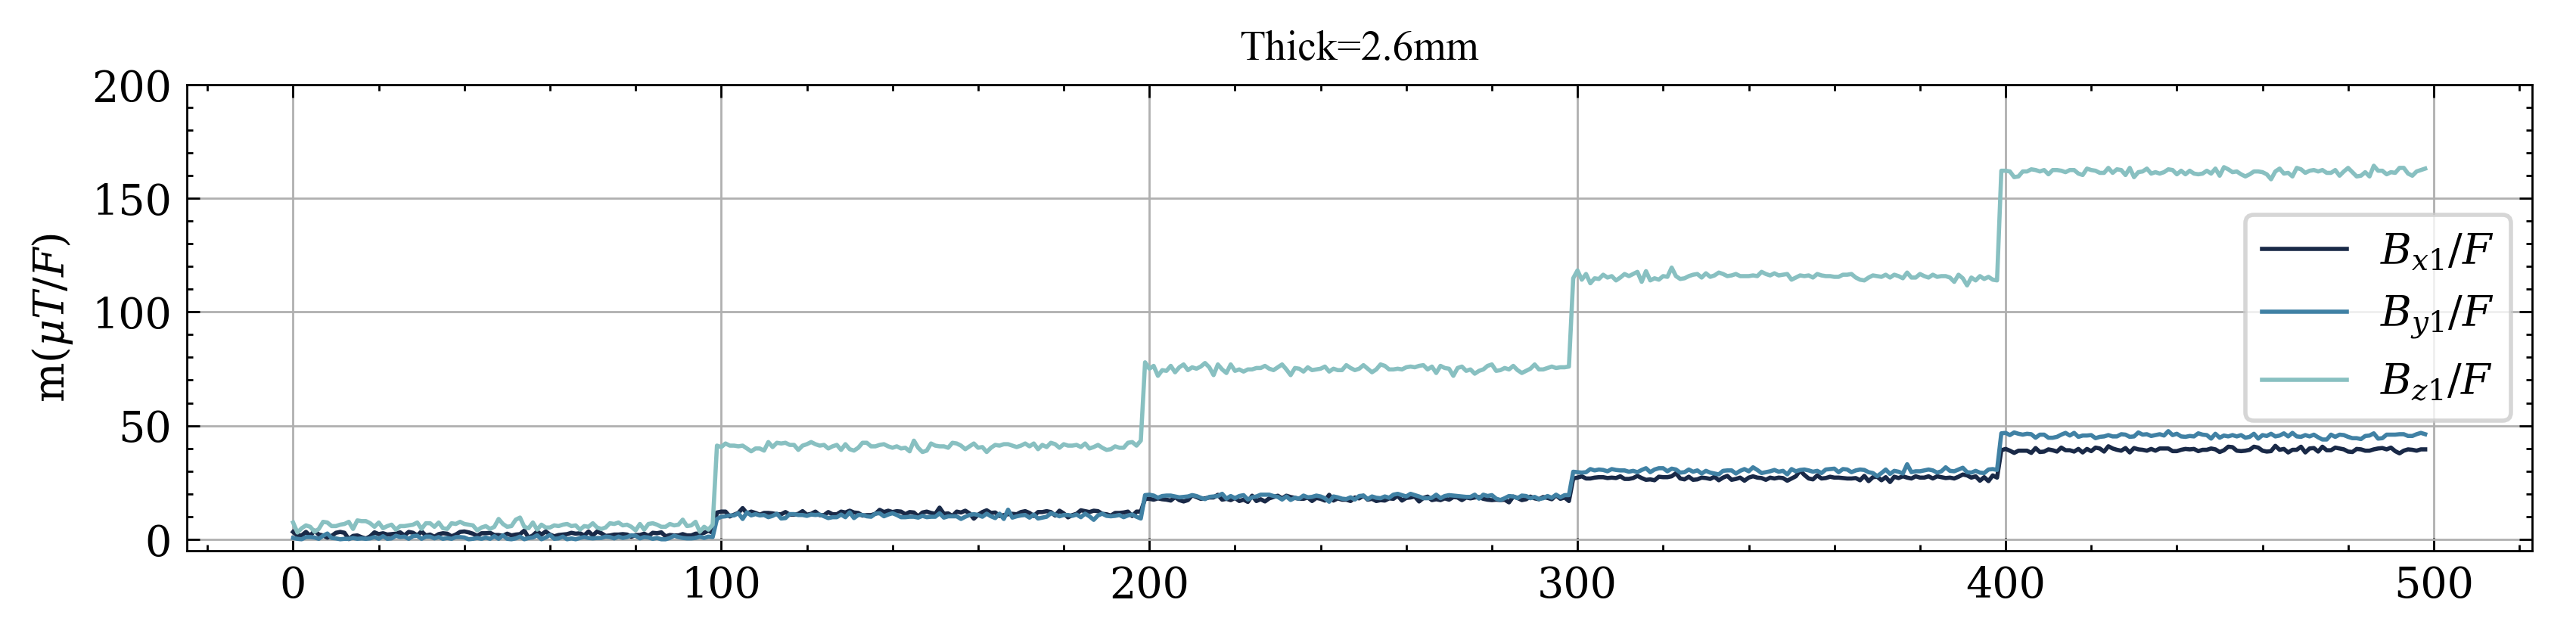

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots
# import matplotlib
# matplotlib.use('TkAgg')

color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
font1 = {'family': 'Times New Roman',
'weight': 'normal',
'size': 10,
}
bias = [[-60,-60,-25],
        [20,70,-207],
        [46,-20,-280],
        [-50,185,205],
        [70,30,-310]]
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    tt=0
    f_raw2 = [1.288,2.092,1.35,0.934,1.545]
    ss = ['1.7','2.3','2.0','1.4','2.6']
    for t in  tset:
        data = tset[t][:,5:]
        if t == 't20':
            data = -tset[t][:,5:]
        plt.figure(figsize=(10, 2))
        for i in range(1):
            plt.plot(np.abs(data[301:800,i*3+0]+bias[tt][0])/f_raw2[tt],linewidth=1,color=color_table[0],label='$B_{x1}/F$')
            plt.plot(np.abs(data[301:800,i*3+1]+bias[tt][1])/f_raw2[tt],linewidth=1,color=color_table[1],label='$B_{y1}/F$')
            plt.plot(np.abs(data[301:800,i*3+2]+bias[tt][2])/f_raw2[tt],linewidth=1,color=color_table[2],label='$B_{z1}/F$')
            if(i==0):
                plt.ylabel('m($\mu T/F$)')
            plt.title('Thick=' + ss[tt]+'mm',fontdict=font1)
            plt.ylim([-5,200])
            plt.grid()
            plt.legend(loc='center right')
        tt+=1

plt.show()

### 本底噪声

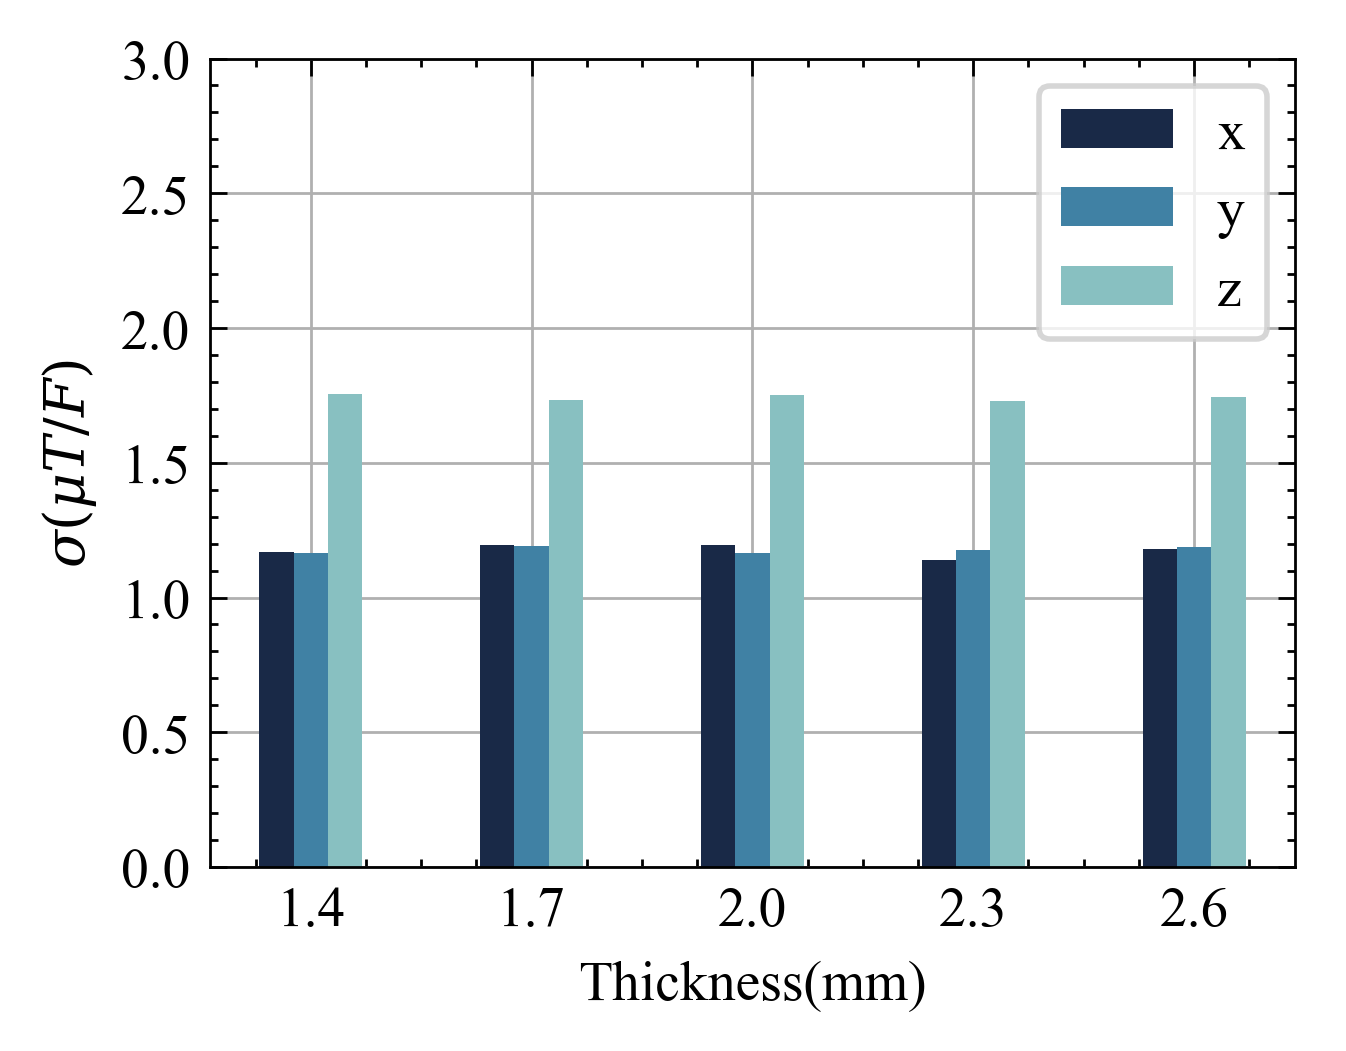

In [124]:
tt=0
f_raw2 = [1.288,2.092,1.35,0.934,1.545]
normsnr = np.zeros((5,36,3))
avrstd = np.zeros((5,3))
ss = ['1.7','2.3','2.0','1.4','2.6']
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']

for t in  tset:
    data = tset[t][:,5:]
    if t == 't20':
        data = -tset[t][:,5:]
    for j in range(36):
        normsnr[tt][j][0] = np.std(data[j*100:j*100+100,0])
        normsnr[tt][j][1] = np.std(data[j*100:j*100+100,1])
        normsnr[tt][j][2] = np.std(data[j*100:j*100+100,2])
    avrstd[tt][0] = np.average(normsnr[tt,:,0])
    avrstd[tt][1] = np.average(normsnr[tt,:,1])
    avrstd[tt][2] = np.average(normsnr[tt,:,2])
    tt+=1
labels=['1.4','1.7','2.0','2.3','2.6']
x = np.linspace(1,10,5)  # the label locations
width = 0.35
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.rc('font',family='Times New Roman') 

    plt.bar(x-width, avrstd[:,0], width=width,color=color_table[0],zorder=2,label='x',linewidth=0.5)
    plt.bar(x, avrstd[:,1],width=width,color=color_table[1],zorder=2,label='y',linewidth=1)
    plt.bar(x+width, avrstd[:,2],width=width,color=color_table[2],zorder=2,label='z',linewidth=1)
    plt.xticks(x,labels=labels)
    plt.ylim(0,3)
    plt.xlabel('Thickness(mm)')
    plt.ylabel('$\sigma(\mu T/F)$')
    plt.legend()
    plt.grid()
plt.show()
    


### 厚度与信噪比分析

[33.45282131 35.39102157 38.31358229 39.08485019 39.47342123]


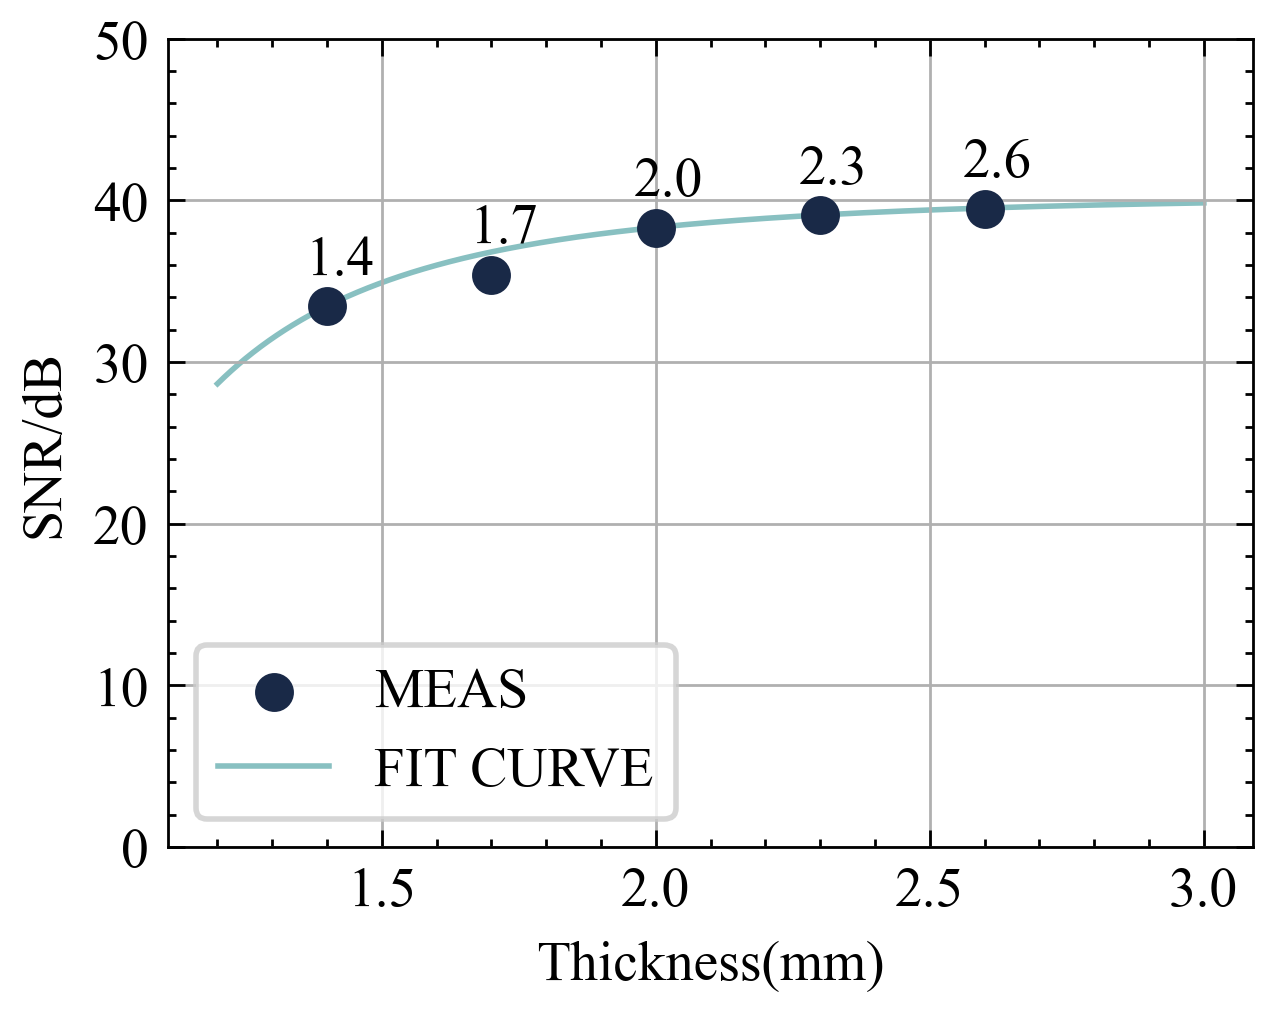

In [25]:
s=np.array([80,100,140,153,160])
sx = [1.4,1.7,2.0,2.3,2.6]
nx = np.linspace(1.2,3.0,1000)
ny = -21.85*np.power(nx,-3.432)+40.34 
snr = 20*np.log10(s/1.7)
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9','#185abd']
annotations=["1.4","1.7","2.0","2.3","2.6"]

print(snr)
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.rc('font',family='Times New Roman') 
    plt.scatter(sx,snr,color=color_table[0],zorder=2,label='MEAS')
    plt.plot(nx,ny,color=color_table[2],zorder=1,label='FIT CURVE')
    for i, label in enumerate(annotations):
        plt.annotate(label, (sx[i]-0.04, snr[i]+2))
    plt.ylim([0,50])
    plt.legend()
    plt.grid()
    plt.ylabel('SNR/dB')
    plt.xlabel('Thickness(mm)')
    plt.show()

### 掺杂质量比与信噪比分析

[0.8, 0.9, 1.0, 1.1, 1.2]
[38.36307467 39.05641845 39.49619181 40.06718289 40.75040475]
[38.36307467 39.05641845 39.49619181 40.06718289 40.75040475]


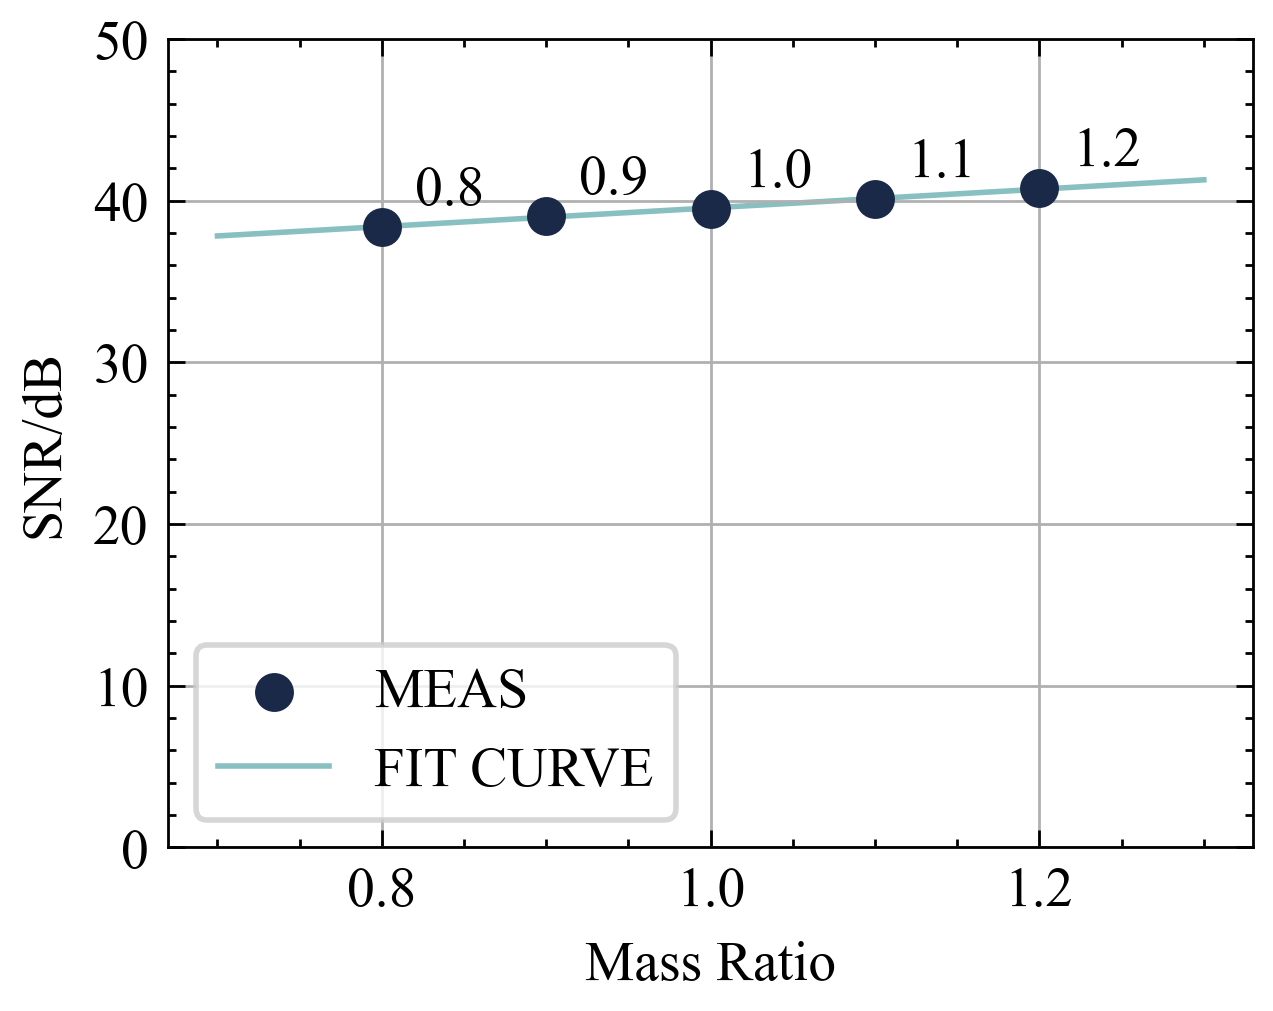

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots
import numpy as np 

s=np.array([140.8,152.5,160.42,171.32,185.34])
sx = [0.8,0.9,1.0,1.1,1.2]
nx = np.linspace(0.7,1.3,1000)
ny = 5.785*nx + 33.76 
snr = 20*np.log10(s/1.7)
print(sx)
print(snr)
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9','#185abd']
annotations=["0.8","0.9","1.0","1.1","1.2"]

print(snr)
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.rc('font',family='Times New Roman') 
    plt.scatter(sx,snr,color=color_table[0],zorder=2,label='MEAS')
    plt.plot(nx,ny,color=color_table[2],zorder=1,label='FIT CURVE')
    for i, label in enumerate(annotations):
        plt.annotate(label, (sx[i]+0.02, snr[i]+1.4))
    plt.ylim([0,50])
    plt.legend()
    plt.grid()
    plt.ylabel('SNR/dB')
    plt.xlabel('Mass Ratio')
    plt.show()